In [ ]:
!git clone https://github.com/eshaanrathi2/lemons.git

Cloning into 'lemons'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 31 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), 1.44 MiB | 4.54 MiB/s, done.


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import skimage.io as sk

from __future__ import print_function
from skimage.feature import peak_local_max
from scipy import ndimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def show(img):
    plt.imshow(img)
    plt.show()

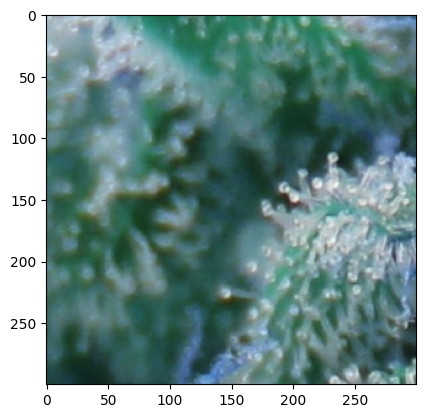

(300, 300, 3)


In [ ]:
fp2 = "/content/trichome1.jpeg"
img2 = cv2.imread(fp2)
show(img2)
print(img2.shape)

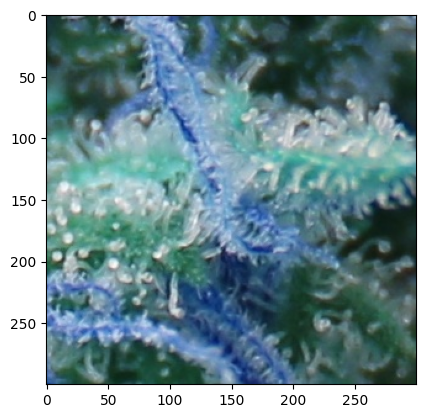

(300, 300, 3)


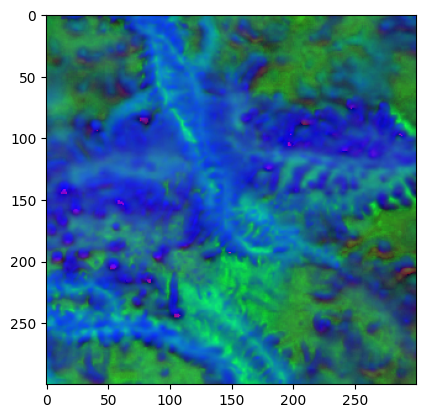

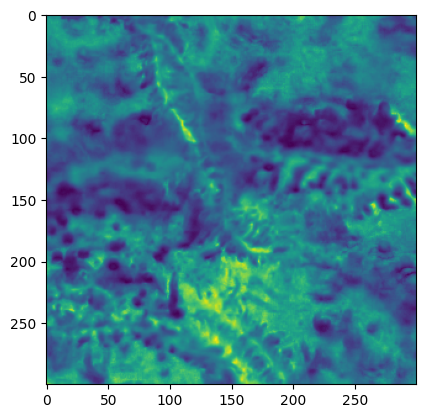

In [ ]:
fp3 = "/content/trichome2.jpeg"
img3 = cv2.imread(fp3)
show(img3)
print(img3.shape)

hsv3 = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
show(hsv3)

h3, s3, v3 = cv2.split(hsv3)
show(s3)

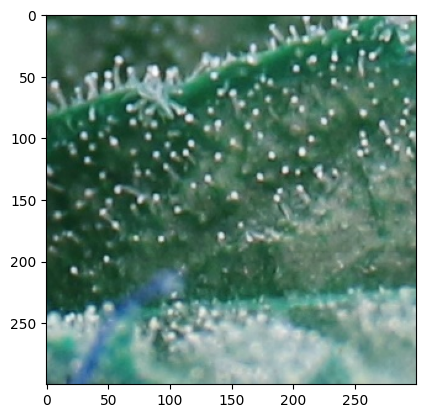

(300, 300, 3)


In [ ]:
fp = "/content/drive/MyDrive/trichomes counting project/trichomes images/trichomes image patches/trichomes_patches_Camera/IMG_5757/IMG_5757_p27.jpg"
img = cv2.imread(fp)
show(img)
print(img.shape)

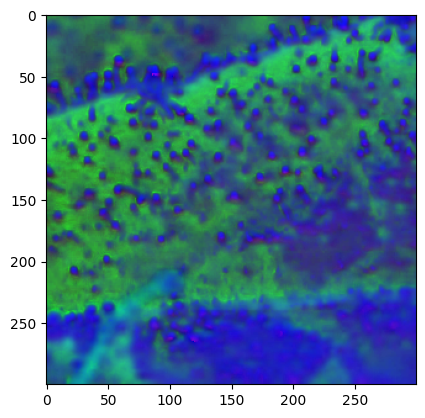

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

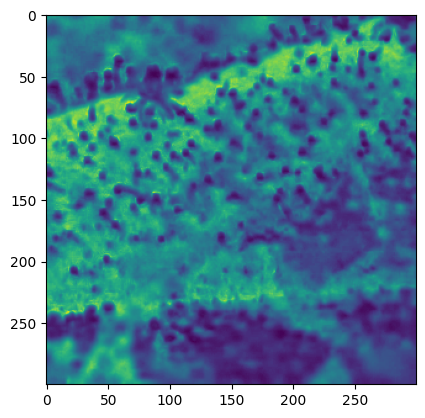

In [ ]:
h, s, v = cv2.split(hsv)
show(s)

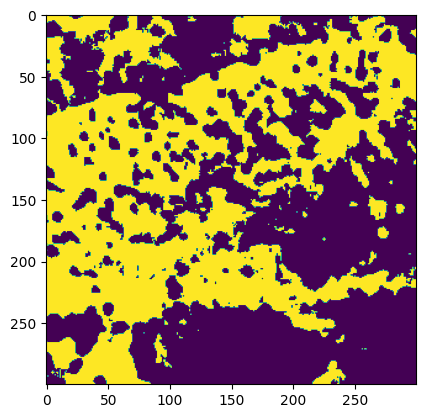

In [ ]:
_, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(thr)

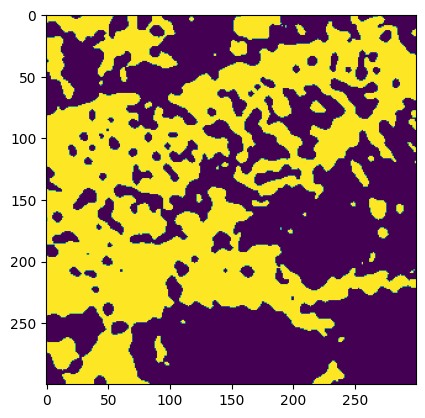

In [ ]:
blur = cv2.medianBlur(thr, 5)
show(blur)

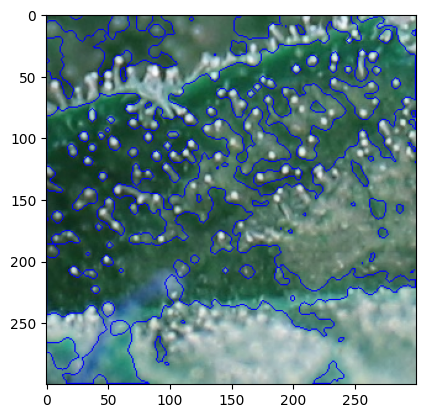

number of lemons found including error =  97


In [ ]:
copy1 = img.copy()
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy1, contours, -1, (0,0,255), 1)
show(copy1)
print("number of lemons found including error = ", len(contours))

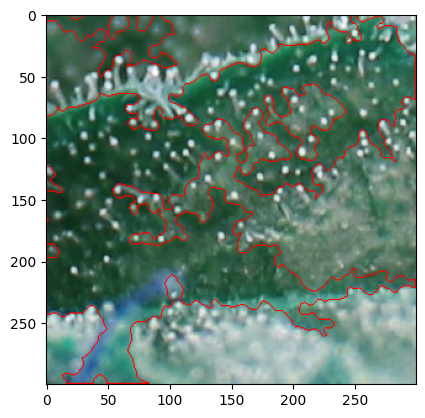

number of lemons found via contour detection =  3


In [ ]:
copy2 = img.copy()
count = []
for x in contours:
    area = cv2.contourArea(x)
    if area > 1000 :
        count.append(x)
cv2.drawContours(copy2, count, -1, (255,0,0), 1)
show(copy2)
print("number of lemons found via contour detection = ", len(count))